# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from secrets import weather_api_key
from citipy import citipy
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


589

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
import math
call_limit = 50
sets = math.ceil(len(cities)/call_limit)
print(sets)
13

# Split up cities array into roughly equal-sized sets under 50 entries each.
city_sets = np.array_split(cities, sets)
len(city_sets)
len(city_sets[0])

# start API calls

url = "http://api.openweathermap.org/data/2.5/weather"

params = {
    "appid": weather_api_key,
    "units": "Imperial"
}

# Collect list of JSON objects. According to Stack Overflow comments, not a good idea to append directly to DataFrame.
response_list = []

print("Beginning Data Retrieval")     
print("-----------------------------")

# iterate through list of cities, only append cities with an entry on OpenWeatherMap.
for set_index, city_set in enumerate(city_sets):
    for city_index, city_set in enumerate(city_sets[set_index]):
        print(f"Processing Record {city_index} of Set {set_index} | {city_sets[set_index][city_index]}")
        params['q'] = city_sets[set_index][city_index]    
        
        response = requests.get(url, params=params)
        print(response.url)
        
        response_json = response.json()
        
        # Check that city has entry on OpenWeatherMap.
        if response_json['cod'] == 200:
            response_list.append(response_json)
        else:
            if response_json['cod'] == 404:
                print("City not found. Skipping...")
#     break
    time.sleep(10)
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

12
Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 0 | hit
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=hit
Processing Record 1 of Set 0 | pimentel
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=pimentel
Processing Record 2 of Set 0 | mataura
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=mataura
Processing Record 3 of Set 0 | punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=punta+arenas
Processing Record 4 of Set 0 | rundu
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=rundu
Processing Record 5 of Set 0 | dargaville
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=dargaville
Processing Record 6 of Set 0 | puert

http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=mosquera
Processing Record 4 of Set 1 | kryve ozero
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=kryve+ozero
Processing Record 5 of Set 1 | ponta do sol
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=ponta+do+sol
Processing Record 6 of Set 1 | itacare
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=itacare
Processing Record 7 of Set 1 | general roca
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=general+roca
Processing Record 8 of Set 1 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=chokurdakh
Processing Record 9 of Set 1 | tsihombe
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39e

http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=basco
Processing Record 10 of Set 2 | butaritari
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=butaritari
Processing Record 11 of Set 2 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=hithadhoo
Processing Record 12 of Set 2 | airai
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=airai
Processing Record 13 of Set 2 | tabiauea
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=tabiauea
Processing Record 14 of Set 2 | vaitupu
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=vaitupu
Processing Record 15 of Set 2 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&un

http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=fairbanks
Processing Record 16 of Set 3 | sao miguel do araguaia
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=sao+miguel+do+araguaia
Processing Record 17 of Set 3 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=bambous+virieux
Processing Record 18 of Set 3 | sentyabrskiy
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=sentyabrskiy
Processing Record 19 of Set 3 | qui nhon
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=qui+nhon
Processing Record 20 of Set 3 | tawang
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=tawang
Processing Record 21 of Set 3 | viedma
http://api.openweathermap.org/data/2.

http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=kununurra
Processing Record 20 of Set 4 | castro
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=castro
Processing Record 21 of Set 4 | chuy
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=chuy
Processing Record 22 of Set 4 | naliya
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=naliya
Processing Record 23 of Set 4 | marcona
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=marcona
Processing Record 24 of Set 4 | talnakh
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=talnakh
Processing Record 25 of Set 4 | cockburn town
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Impe

http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=tabalosos
Processing Record 26 of Set 5 | port-gentil
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=port-gentil
Processing Record 27 of Set 5 | grand river south east
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=grand+river+south+east
Processing Record 28 of Set 5 | griffith
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=griffith
Processing Record 29 of Set 5 | nanortalik
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=nanortalik
Processing Record 30 of Set 5 | barroualie
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=barroualie
Processing Record 31 of Set 5 | barentsburg
http://api.openweathermap.org/data/2

http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=cidreira
Processing Record 31 of Set 6 | takhtamygda
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=takhtamygda
Processing Record 32 of Set 6 | makakilo city
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=makakilo+city
Processing Record 33 of Set 6 | chagda
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=chagda
Processing Record 34 of Set 6 | kutoarjo
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=kutoarjo
Processing Record 35 of Set 6 | dikson
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=dikson
Processing Record 36 of Set 6 | meyungs
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897ba

http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=baruun-urt
Processing Record 36 of Set 7 | hudiksvall
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=hudiksvall
Processing Record 37 of Set 7 | fortuna
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=fortuna
Processing Record 38 of Set 7 | tidore
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=tidore
Processing Record 39 of Set 7 | sioux lookout
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=sioux+lookout
Processing Record 40 of Set 7 | caravelas
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=caravelas
Processing Record 41 of Set 7 | healdsburg
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee827

http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=caborca
Processing Record 42 of Set 8 | nyagan
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=nyagan
Processing Record 43 of Set 8 | ayan
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=ayan
Processing Record 44 of Set 8 | priiskovyy
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=priiskovyy
Processing Record 45 of Set 8 | hakkari
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=hakkari
Processing Record 46 of Set 8 | grindavik
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=grindavik
Processing Record 47 of Set 8 | tuggurt
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=

http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=puerto+escondido
Processing Record 48 of Set 9 | gangotri
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=gangotri
Processing Record 0 of Set 10 | sisophon
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=sisophon
Processing Record 1 of Set 10 | melville
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=melville
Processing Record 2 of Set 10 | gunjur
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=gunjur
Processing Record 3 of Set 10 | shingu
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=shingu
Processing Record 4 of Set 10 | santa fe
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba3960

http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=karaul
Processing Record 4 of Set 11 | wad madani
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=wad+madani
Processing Record 5 of Set 11 | taltal
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=taltal
Processing Record 6 of Set 11 | longfeng
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=longfeng
Processing Record 7 of Set 11 | dibaya
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=dibaya
Processing Record 8 of Set 11 | huilong
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&units=Imperial&q=huilong
Processing Record 9 of Set 11 | key west
http://api.openweathermap.org/data/2.5/weather?appid=c9cdbbde39ee82752897baeba396066c&unit

In [8]:
response_list[0:12]

[{'coord': {'lon': 42.83, 'lat': 33.64},
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01n'}],
  'base': 'stations',
  'main': {'temp': 71.8,
   'feels_like': 66.36,
   'temp_min': 71.8,
   'temp_max': 71.8,
   'pressure': 1015,
   'humidity': 37,
   'sea_level': 1015,
   'grnd_level': 1007},
  'visibility': 10000,
  'wind': {'speed': 7.23, 'deg': 341},
  'clouds': {'all': 0},
  'dt': 1603245346,
  'sys': {'country': 'IQ', 'sunrise': 1603250294, 'sunset': 1603290479},
  'timezone': 10800,
  'id': 95788,
  'name': 'Hīt',
  'cod': 200},
 {'coord': {'lon': -79.93, 'lat': -6.84},
  'weather': [{'id': 802,
    'main': 'Clouds',
    'description': 'scattered clouds',
    'icon': '03n'}],
  'base': 'stations',
  'main': {'temp': 62.55,
   'feels_like': 58.14,
   'temp_min': 62.55,
   'temp_max': 62.55,
   'pressure': 1014,
   'humidity': 85,
   'sea_level': 1014,
   'grnd_level': 1012},
  'visibility': 10000,
  'wind': {'speed': 12.35, 'deg': 165}

In [9]:

# Use list comprehensions to collect relevant data from response JSON objects.

city_names_list = [response.get('name') for response in response_list]
cloudiness_list = [response.get('clouds').get('all') for response in response_list]
country_list = [response.get('sys').get('country') for response in response_list]
dates_list = [response.get('dt') for response in response_list]
humidity_list = [response.get('main').get('humidity') for response in response_list]
lats_list = [response.get('coord').get('lat') for response in response_list]
lngs_list = [response.get('coord').get('lon') for response in response_list]
temps_list = [response.get('main').get('temp_max') for response in response_list]
wind_list = [response.get('wind').get('speed') for response in response_list]

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# Create a DataFrame.
city_data_df = pd.DataFrame(list(zip(city_names_list, cloudiness_list, country_list,
                                     dates_list, humidity_list, lats_list, lngs_list, 
                                     temps_list, wind_list)), 
                            columns = ['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed'])

# export city data to .csv in working directory.
city_data_df.to_csv('city_weather_data.csv', index=False)
city_data_df.count()

City          537
Cloudiness    537
Country       537
Date          537
Humidity      537
Lat           537
Lng           537
Max Temp      537
Wind Speed    537
dtype: int64

In [11]:
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hīt,0,IQ,1603245346,37,33.64,42.83,71.80,7.23
1,Pimentel,35,PE,1603245109,85,-6.84,-79.93,62.55,12.35
2,Mataura,17,NZ,1603245134,61,-46.19,168.86,57.00,11.01
3,Punta Arenas,75,CL,1603245143,68,-53.15,-70.92,41.00,6.93
4,Rundu,3,NA,1603245347,24,-17.93,19.77,67.33,3.76


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
# --- find cities that have humidity over 100% ---
humidity_over_100 = cities_temps_df.loc[cities_temps_df["Humidity (%)"] > 100, :]

if humidity_over_100.empty == True:
    print("There are no cities with humidity values over 100%")
    print("Using original dataframe to continue with plotting...")
    
    # --- extract relevant fields from the data frame for plotting ---
    latitudes = cities_temps_df["Lat"]
    temperatures = cities_temps_df["Max Temp (F)"]
    humidity = cities_temps_df["Humidity (%)"]
    cloudiness = cities_temps_df["Cloudiness (%)"]
    windspeed = cities_temps_df["Wind Speed (mph)"]
    
else:
    # -- get the indices of cities that have humidity over 100% ---
    Humidityover100Index = humidity_over_100.index
    
    # --- create a clean DataFrame by dropping all humidity outliers by index found above ---
    clean_city_data = cities_temps_df.drop(Humidityover100Index).reset_index(drop=True)
    clean_city_data.head()
    
    # --- extract relevant fields from the data frame for plotting ---
    latitudes = clean_city_data["Lat"]
    temperatures = clean_city_data["Max Temp (F)"]
    humidity = clean_city_data["Humidity (%)"]
    cloudiness = clean_city_data["Cloudiness (%)"]
    windspeed = clean_city_data["Wind Speed (mph)"]

    # --- export the new dataframe into a csv ---
    clean_city_data.to_csv("../output_data/clean_city_data.csv", index=True, index_label="City ID", header=True)

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

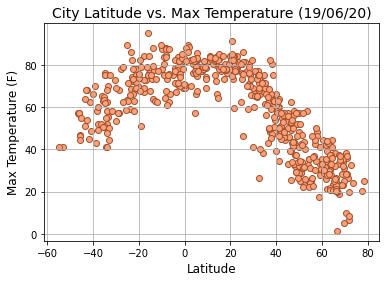

In [13]:

# --- create a scatter plot depicting latitude vs temperature ---

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolors="lightsalmon", edgecolors="sienna")

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Max Temperature (19/06/20)", fontsize=14)
plt.ylabel("Max Temperature (F)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- display and save the plot ---
#plt.savefig("../Images/latitude-vs-temp.png")
plt.show()

## Latitude vs. Humidity Plot

FileNotFoundError: [Errno 2] No such file or directory: '../Images/latitude-vs-humidity.png'

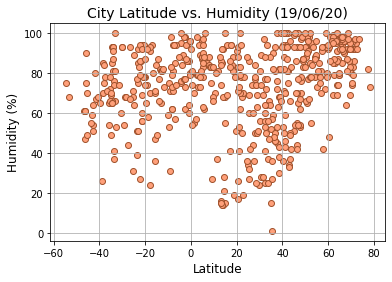

In [14]:
# --- create a scatter plot depicting latitude vs humidity ---
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", facecolors="lightsalmon", edgecolors="sienna")

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Humidity (19/06/20)", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- display and save the plot ---
plt.savefig("../Images/latitude-vs-humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

FileNotFoundError: [Errno 2] No such file or directory: '../Images/latitude-vs-cloudiness.png'

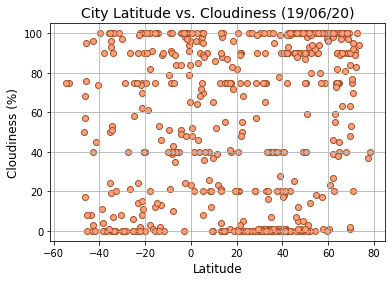

In [15]:

# --- create a scatter plot depicting latitude vs cloudiness ---
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o", facecolors="lightsalmon", edgecolors="sienna")

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Cloudiness (19/06/20)", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- display and save the plot ---
plt.savefig("../Images/latitude-vs-cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

FileNotFoundError: [Errno 2] No such file or directory: '../Images/latitude-vs-windspeed.png'

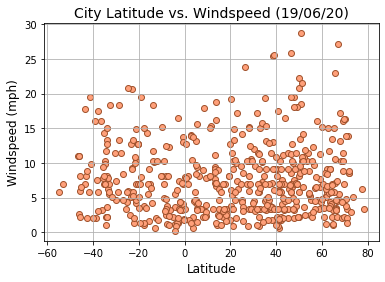

In [16]:
# --- create a scatter plot depicting latitude vs wind speed ---
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", facecolors="lightsalmon", edgecolors="sienna")

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Windspeed (19/06/20)", fontsize=14)
plt.ylabel("Windspeed (mph)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- display and save the plot ---
plt.savefig("../Images/latitude-vs-windspeed.png")
plt.show()

## Linear Regression

In [17]:
def plot_linear_regression(x, y, ax=None, **kwargs):
    
    # --- use the axes specified ---
    ax = ax
    
    # --- get linear regression values and store in variables ---
    slope, intercept, rvalue, pvalue, stderror = linregress(x,y)
    print(f"Linear Regression Completed...")    
    print(f"The R Squared is: {rvalue**2}")

    # y = m * x + b
    regress_values = slope * x + intercept
    
    # --- create line equation ---
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
                                                          
    # --- plot the linear model ---
    ax.plot(x, regress_values, color="firebrick")
    
    # --- return the plot and line equation created ---
    return ax, line_eq


In [18]:
# --- find and store rows for Northern Hemisphere dataframe (greater than or equal to 0 degrees latitude) --- 
if humidity_over_100.empty == True:
    northern_hemisphere = cities_temps_df.loc[cities_temps_df["Lat"] >= 0, :].copy().reset_index(drop=True)
else:
    northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0, :].copy().reset_index(drop=True)
    

# --- find and store rows for Southern Hemisphere dataframe (less than 0 degrees latitude) ---
if humidity_over_100.empty == True:
    southern_hemisphere = cities_temps_df.loc[cities_temps_df["Lat"] < 0, :].copy().reset_index(drop=True)
else:
    southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0, :].copy().reset_index(drop=True)    

# --- extract relevant fields from both data frames for plotting ---
north_latitudes = northern_hemisphere["Lat"]
north_temperatures = northern_hemisphere["Max Temp (F)"]
north_humidity = northern_hemisphere["Humidity (%)"]
north_cloudiness = northern_hemisphere["Cloudiness (%)"]
north_windspeed = northern_hemisphere["Wind Speed (mph)"]

south_latitudes = southern_hemisphere["Lat"]
south_temperatures = southern_hemisphere["Max Temp (F)"]
south_humidity = southern_hemisphere["Humidity (%)"]
south_cloudiness = southern_hemisphere["Cloudiness (%)"]
south_windspeed = southern_hemisphere["Wind Speed (mph)"]

NameError: name 'humidity_over_100' is not defined

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

NameError: name 'north_latitudes' is not defined

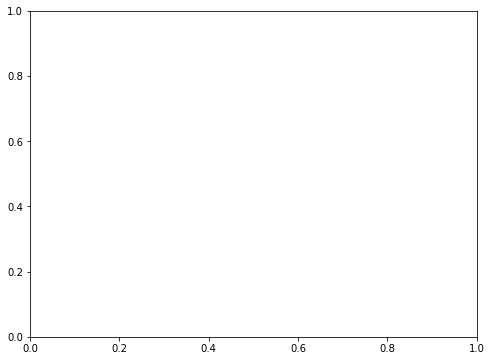

In [19]:
 #Run linear regression on Northern Hemisphere - Temperature (F) vs. Latitude
#**********************************************************************************

# --- create scatter plot ---
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(north_latitudes, north_temperatures, marker="o", facecolors="aquamarine", edgecolors="darkcyan")

# --- call linear regression plot function to retrieve plot and line equation (for annotation) ---
ax, line_eq = plot_linear_regression(north_latitudes, north_temperatures, ax)

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Max Temperature in the Northern Hemisphere (19/06/20)", fontsize=14)
plt.ylabel("Max Temperature (F)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- annotate the linear regression line equation on the plot ---
plt.annotate(line_eq,(5,45),fontsize=16,color="firebrick")

# --- display and save the plot ---
plt.savefig("../Images/northern-latitude-vs-temp-linreg.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

NameError: name 'south_latitudes' is not defined

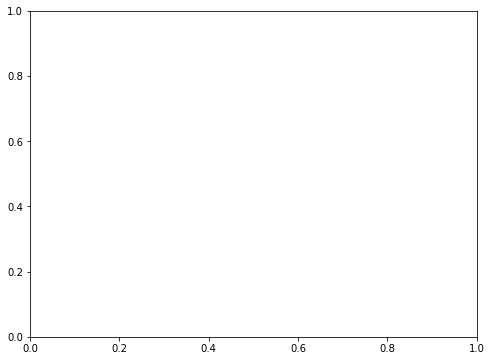

In [20]:
#**********************************************************************************
# Run linear regression on Southern Hemisphere - Temperature (F) vs. Latitude
#**********************************************************************************

# --- create scatter plot ---
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(south_latitudes, south_temperatures, marker="o", facecolors="gold", edgecolors="darkgoldenrod")

# --- call linear regression plot function to retrieve plot and line equation (for annotation) ---
ax, line_eq = plot_linear_regression(south_latitudes, south_temperatures, ax)

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Max Temperature in the Southern Hemisphere (19/06/20)", fontsize=14)
plt.ylabel("Max Temperature (F)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- annotate the linear regression line equation on the plot ---
plt.annotate(line_eq,(-25, 35),fontsize=16,color="firebrick")

# --- display and save the plot ---
plt.savefig("../Images/southern-latitude-vs-temp-linreg.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:

#**********************************************************************************
# Run linear regression on Northern Hemisphere - Humidity (%) vs. Latitude
#**********************************************************************************

# --- create scatter plot ---
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(north_latitudes, north_humidity, marker="o", facecolors="aquamarine", edgecolors="darkcyan")

# --- call linear regression plot function to retrieve plot and line equation (for annotation) ---
ax, line_eq = plot_linear_regression(north_latitudes, north_humidity, ax)

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Humidity in the Northern Hemisphere (19/06/20)", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- annotate the linear regression line equation on the plot ---
plt.annotate(line_eq,(50,10),fontsize=16,color="firebrick")

# --- display and save the plot ---
plt.savefig("../Images/northern-latitude-vs-humidity-linreg.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:

#**********************************************************************************
# Run linear regression on Southern Hemisphere - Humidity (%) vs. Latitude
#**********************************************************************************

# --- create scatter plot ---
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(south_latitudes, south_humidity, marker="o", facecolors="gold", edgecolors="darkgoldenrod")

# --- call linear regression plot function to retrieve plot and line equation (for annotation) ---
ax, line_eq = plot_linear_regression(south_latitudes, south_humidity, ax)

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Humidity in the Southern Hemisphere (19/06/20)", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- annotate the linear regression line equation on the plot ---
plt.annotate(line_eq,(-55, 25),fontsize=16,color="firebrick")

# --- display and save the plot ---
plt.savefig("../Images/southern-latitude-vs-humidity-linreg.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
#************************************************************************************
# Run linear regression on Northern Hemisphere - Cloudiness (%) vs. Latitude 
#************************************************************************************

# --- create scatter plot ---
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(north_latitudes, north_cloudiness, marker="o", facecolors="aquamarine", edgecolors="darkcyan")

# --- call linear regression plot function to retrieve plot and line equation (for annotation) ---
ax, line_eq = plot_linear_regression(north_latitudes, north_cloudiness, ax)

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Cloudiness in the Northern Hemisphere (19/06/20)", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- annotate the linear regression line equation on the plot ---
plt.annotate(line_eq,(1,10),fontsize=16,color="firebrick")

# --- display and save the plot ---
plt.savefig("../Images/northern-latitude-vs-cloudiness-linreg.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
#************************************************************************************
# Run linear regression on Southern Hemisphere - Cloudiness (%) vs. Latitude
#************************************************************************************

# --- create scatter plot ---
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(south_latitudes, south_cloudiness, marker="o", facecolors="gold", edgecolors="darkgoldenrod")

# --- call linear regression plot function to retrieve plot and line equation (for annotation) ---
ax, line_eq = plot_linear_regression(south_latitudes, south_cloudiness, ax)

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Cloudiness in the Southern Hemisphere (19/06/20)", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- annotate the linear regression line equation on the plot ---
plt.annotate(line_eq,(-55, 25),fontsize=16,color="firebrick")

# --- display and save the plot ---
plt.savefig("../Images/southern-latitude-vs-cloudiness-linreg.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:

#************************************************************************************
# Run linear regression on Northern Hemisphere - Wind Speed (mph) vs. Latitude
#************************************************************************************

# --- create scatter plot ---
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(north_latitudes, north_windspeed, marker="o", facecolors="aquamarine", edgecolors="darkcyan")

# --- call linear regression plot function to retrieve plot and line equation (for annotation) ---
ax, line_eq = plot_linear_regression(north_latitudes, north_windspeed, ax)

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Wind Speed in the Northern Hemisphere (19/06/20)", fontsize=14)
plt.ylabel("Wind Speed (mph)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- annotate the linear regression line equation on the plot ---
plt.annotate(line_eq,(5,26),fontsize=16,color="firebrick")

# --- display and save the plot ---
plt.savefig("../Images/northern-latitude-vs-windspeed-linreg.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:

#************************************************************************************
# Run linear regression on Southern Hemisphere - Wind Speed (mph) vs. Latitude 
#************************************************************************************

# --- create scatter plot ---
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(south_latitudes, south_windspeed, marker="o", facecolors="gold", edgecolors="darkgoldenrod")

# --- call linear regression plot function to retrieve plot and line equation (for annotation) ---
ax, line_eq = plot_linear_regression(south_latitudes, south_windspeed, ax)

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Wind Speed in the Southern Hemisphere (19/06/20)", fontsize=14)
plt.ylabel("Wind Speed (mph)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- annotate the linear regression line equation on the plot ---
plt.annotate(line_eq,(-55, 20),fontsize=16,color="firebrick")

# --- display and save the plot ---
plt.savefig("../Images/southern-latitude-vs-windspeed-linreg.png")
plt.show()